In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
save_plot = False

# Entropies

In [3]:
def process_entropy(filename, calc_ent = 'ap'):
    '''
    Selects entropies based on user input, melts imported dataframe
    and returns it so user can use catplot.
    
    calc_ent: 'ap' or 'sam'
    '''
    ent = pd.read_excel(f'entropies/{filename}.xlsx')
    ent['group'] = ent['unique_id'].apply(lambda x: 'control' if 'cecon' in x else 'pd')

    ent_col = [col for col in ent.columns if (f'{calc_ent}-' in col) & ('elbow' not in col)]
    ent_col.sort()
    ent = ent[['unique_id','group','dance_group','time'] + ent_col]

    ent_melt = ent.melt(id_vars = ['unique_id','group','dance_group','time'])
    return ent_melt, ent

# Approximate Entropy

## With calculated Tau

In [5]:
var_melt, var = process_entropy('varying_lag_entropy')

/home/jupyter-pomkos/.conda/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


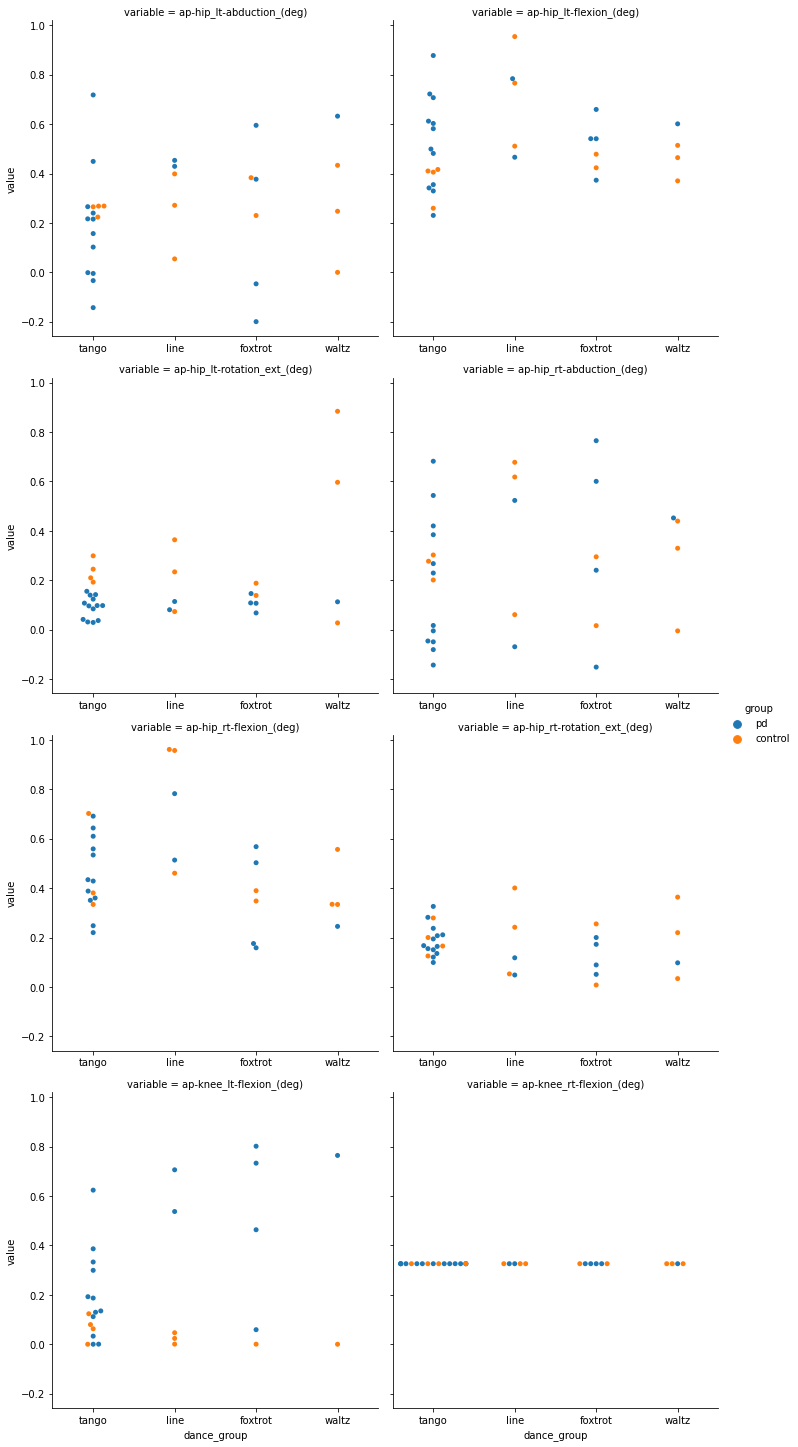

In [6]:
sns.catplot(x='dance_group',y='value',data=var_melt, col='variable', hue='group', kind = 'swarm', col_wrap = 2, sharex=False)

## With Tau = 30

In [9]:
lag2_melt = process_entropy('lag2_entropy')

In [10]:
sns.catplot(x='dance_group',y='value',data=lag2_melt, col='variable', hue='group', kind = 'box', col_wrap = 2, sharex=False)

AttributeError: 'tuple' object has no attribute 'get'

# Segments

In [12]:
df = pd.read_csv('data_formatted/segments_proccessed.csv')

/home/jupyter-pomkos/.conda/envs/data_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
base_cols = ['id', 'group', 'date','dance','time','marker']
ll_cols = [col for col in df.columns if ('acceleration' in col) & 
                  (('thigh' in col) | 
                   ('shank' in col) | 
                   ('pelvis' in col))]
lower_limbs = df[base_cols + ll_cols]

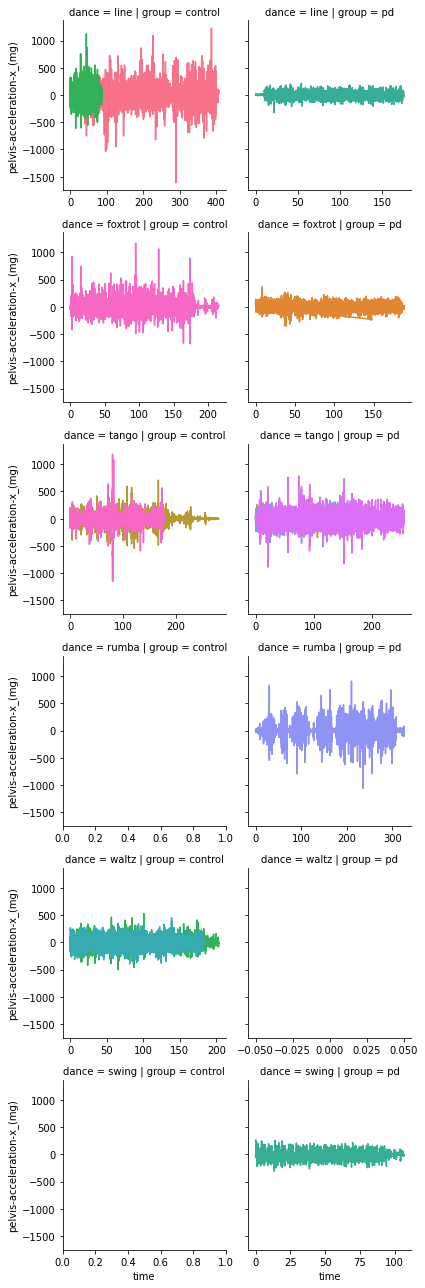

In [14]:
g = sns.FacetGrid(lower_limbs, col='group', row='dance', hue = 'id', sharex=False)
g.map(plt.plot, 'time','pelvis-acceleration-x_(mg)')

In [15]:
lower_limbs.tail()

,id,group,date,dance,time,marker,pelvis-acceleration-x_(mg),pelvis-acceleration-y_(mg),pelvis-acceleration-z_(mg),thigh_lt-acceleration-x_(mg),...,thigh_lt-acceleration-z_(mg),shank_lt-acceleration-x_(mg),shank_lt-acceleration-y_(mg),shank_lt-acceleration-z_(mg),thigh_rt-acceleration-x_(mg),thigh_rt-acceleration-y_(mg),thigh_rt-acceleration-z_(mg),shank_rt-acceleration-x_(mg),shank_rt-acceleration-y_(mg),shank_rt-acceleration-z_(mg)
552502,pddancecon003,control,2018-10-18 13:50:00,foxtrot,167.075,NaN,-182.210,127.413,-30.5221,-142.863,...,-11.75240,-131.880,-17.58000,-26.11940,-686.1370,-690.978,28.1677,167.058,-380.940,-146.319
552503,pddancecon003,control,2018-10-18 13:50:00,foxtrot,167.085,NaN,-189.481,139.093,-19.7388,-157.758,...,5.04823,-142.684,-7.28817,-12.95000,-643.5630,-717.590,73.7682,215.472,-224.974,-234.344
552504,pddancecon003,control,2018-10-18 13:50:00,foxtrot,167.095,NaN,-201.374,151.012,-25.8522,-168.671,...,20.31590,-151.927,-1.84852,-12.43030,-390.1190,-645.679,29.3614,280.252,-228.830,-247.915
552505,pddancecon003,control,2018-10-18 13:50:00,foxtrot,167.105,NaN,-198.977,151.530,-22.1513,-169.914,...,33.85240,-150.254,8.09620,-4.95277,-92.3491,-603.329,-127.2580,330.612,-385.057,-242.362
552506,pddancecon003,control,2018-10-18 13:50:00,foxtrot,167.115,NaN,-206.800,155.660,-29.6965,-170.045,...,34.77060,-152.883,11.88030,6.44953,164.5240,-609.164,-265.4400,456.182,-508.553,-253.161


# Time Domain

In [16]:
def isolate_variables(part: str, dance:str = 'tango'):
    '''
    Isolates participant and limb measure by dance and date. Checks whether the the date is unique.
    If not unique, returns two dataframes.
    '''
    
    part_df = lower_limbs[(lower_limbs['id']==part) & (lower_limbs['dance']==dance)]
    dates = part_df['date'].unique()
    if len(dates) > 1:
        print(f'{part} has more than one recording of {dance}')
    res = []
    for d in dates:
        temp = part_df[part_df['date']==d]
        res.append(temp)
    return res

In [17]:
def plot_time_domain(dataframe: pd.DataFrame, col: str):
    '''
    Plots the raw time series. Assume 'time' col.
    
    col is the name of y axis
    '''
    # Time domain
    plt.plot(dataframe['time'],dataframe[col])
    plt.xlabel('Time')
    plt.ylabel(col)

In [18]:
def format_series(my_series):
    '''
    Just ffills if needed.
    
    NOTE: NaNs are handled by ffill.
    '''
    num_nan = my_series.isna().sum()
    if num_nan > 0:
        print(f"Ffill is used to fill {num_nan} NaNs")
        my_series = my_series.fillna(method='ffill')
    return my_series
    

In [19]:
pd5 = isolate_variables('pddance005')
pd5 = pd5[0]

pddance005 has more than one recording of tango


In [20]:
time_x = pd5[['time','pelvis-acceleration-x_(mg)']]
time_x.columns = ['time', 'pelvic_ax']
time_x['pelvic_ax'] = time_x['pelvic_ax'].fillna(method='ffill')

<ipython-input-20-0d098e37f079>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_x['pelvic_ax'] = time_x['pelvic_ax'].fillna(method='ffill')


In [21]:
time_x.head()

,time,pelvic_ax
419347,0.005,11.79920
419348,0.015,7.56536
419349,0.025,8.55965
419350,0.035,9.83922
419351,0.045,-6.91629


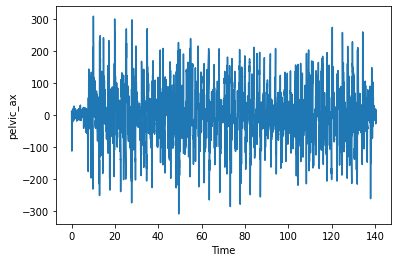

In [22]:
# Time domain
plot_time_domain(time_x, 'pelvic_ax')

## Finding periodocity with ACF

[Time series analysis using pandas in python](https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8)

Periodicity = seasonality

In [23]:
def get_acf(my_series, plot=True):
    '''
    Plots ACF at lags up to full length of dataset
    '''
    from statsmodels import api as sm
    # get the autocorrelation coefficient
    acf = sm.tsa.acf(my_series, nlags=len(my_series), fft=True)
    if plot:
        pd.plotting.autocorrelation_plot(my_series)
    return acf

In [24]:
from seasonal import fit_seasons
from numpy import tile

#Find seasonality and trend in data
seasonal_pattern, trend = fit_seasons(bike_sharing["cnt"], period=365)
#Fill the seasonal pattern for the entire data for visualization
bike_sharing["seasonality"] = tile(seasonal_pattern, len(bike_sharing)//len(seasonal_pattern) + 1)[:len(bike_sharing)]
bike_sharing["trend"] = trend
#Calculate residual
bike_sharing["residual"] = bike_sharing["cnt"] - bike_sharing["seasonality"] - bike_sharing["trend"]

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=True,
                        figsize=(10,8))

bike_sharing["trend"].plot(ax=axes[0])
axes[0].set_ylabel('Trend')
bike_sharing["seasonality"].plot(ax=axes[1])
axes[1].set_ylabel('Seasonality')
bike_sharing["residual"].plot(ax=axes[2])
axes[2].set_ylabel('Residual')

NameError: name 'bike_sharing' is not defined

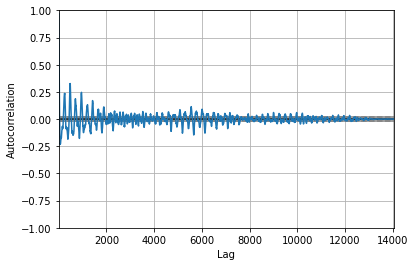

In [25]:
acf = get_acf(time_x['pelvic_ax'])

(0.0, 1000.0)

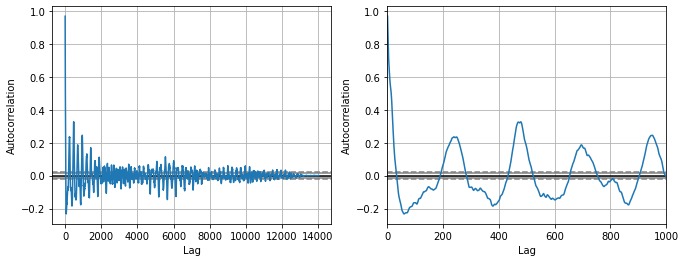

In [26]:
fig, ax = plt.subplots(ncols=2, figsize = (11,4))
pd.plotting.autocorrelation_plot(time_x['pelvic_ax'], ax=ax[0])
pd.plotting.autocorrelation_plot(time_x['pelvic_ax'], ax=ax[1])
ax[1].set_xlim(0,1000)

* ACF: how correlated time series is with itself at that lag
* Ex: if original time series repeats/cycles every days, there should be a large spike at lag of 2 days

In this plot: Looks like the best autocorrelation is of 0.3 at lag 440ish, with correlational coefficients decreasing to nonsignificant after lag 2000.

So time series repeats every 430ish units.

## Time Series Decomposition

In [29]:
def deprecated_decomp_time(my_series):
    'plots the three components of a time series: seasonality, trend, residuals'
    from seasonal import fit_seasons
    from numpy import tile
    
    data = pd.DataFrame({
        'time_series':my_series
    })
    #Find seasonality and trend in data
    seasonal_pattern, trend = fit_seasons(data["time_series"], period=None) # estimate a seasonality pattern
    #Fill the seasonal pattern for the entire data for visualization
    data["seasonality"] = tile(seasonal_pattern, len(time_x)//len(seasonal_pattern) + 1)[:len(time_x)]
    data["trend"] = trend
    #Calculate residual
    data["residual"] = data["time_series"] - data["seasonality"] - data["trend"]

    fig, axes = plt.subplots(nrows=3,
                             ncols=1,
                             sharex=True,
                            figsize=(10,8))

    data["trend"].plot(ax=axes[0])
    axes[0].set_ylabel('Trend')
    data["seasonality"].plot(ax=axes[1])
    axes[1].set_ylabel('Seasonality')
    data["residual"].plot(ax=axes[2])
    axes[2].set_ylabel('Residual')

In [36]:
pelv = time_x['pelvic_ax']

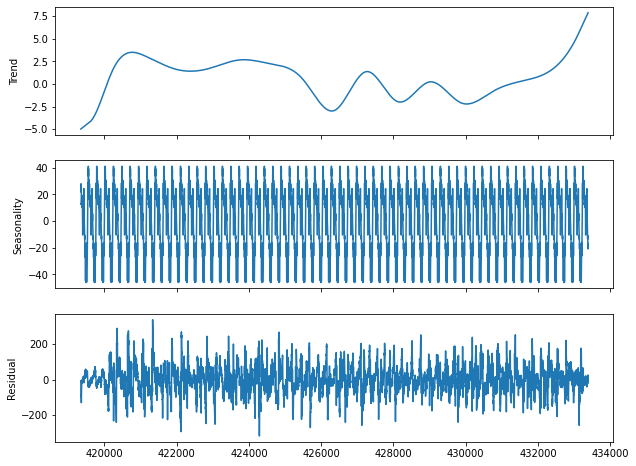

In [37]:
deprecated_decomp_time(pelv)

1. Trend: long term movement is stable
2. Seasonality: around 20 units

In [38]:
def test_stationary(my_series):
    'tests whether time series is stationary. Needed for modeling.'
    from statsmodels.tsa.stattools import adfuller, kpss
    # ADF Test
    result = adfuller(my_series.values, autolag='AIC')
    if result[1] <= 0.05:
        print(f"ADF says it is stationary")
    else:
        print(f"ADF says it is NOT stationary")

    # KPSS Test
    result = kpss(my_series.values, regression='c')
    if result[1] <= 0.05:
        print(f"KPSS says it is NOT stationary")
    else:
        print(f"KPSS says it is stationary")

In [39]:
test_stationary(pelv)

ADF says it is stationary
KPSS says it is stationary


/home/jupyter-pomkos/.conda/envs/data_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/jupyter-pomkos/.conda/envs/data_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [40]:
def test_seasonality(my_series):
    'tests whether the time series has seasonality'
    print("If ACF plot has repeated spikes at multiples of a window, then seasonality is there")
    

In [43]:
def plot_acf(my_acf):
    from statsmodels.tsa.stattools import acf, pacf
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    # Calculate ACF and PACF upto 50 lags
    # acf_50 = acf(df.value, nlags=50)
    # pacf_50 = pacf(df.value, nlags=50)

    # Draw Plot
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(list(my_acf), lags=len(my_acf), ax=axes[0])
    plot_pacf(list(my_acf), lags=len(my_acf), ax=axes[1])

# Frequency Content

FFT

In [45]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange, signal

In [46]:
# get the frequency and spectrum
f, Pxx = signal.periodogram(time_x['pelvic_ax'], fs = 100, window='hanning', scaling='spectrum')

Text(0, 0.5, 'Spectrum Amplitude')

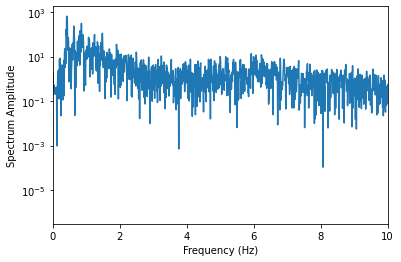

In [47]:
plt.plot(f, Pxx)
plt.xlim(0, 10)
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectrum Amplitude')

From the spectrum, we can see some peaks, and the corresponding frequency to each peak indicates the periodic signals, and how strong this frequency signal is showing in the spectrum amplitude. The higher the peak, the stronger of this signal repeating itself. 

Let's print out the top 5 peaks, and see how many days corresponding to them.

In [48]:
# print the top 6 period in the signal
for amp_arg in np.argsort(np.abs(Pxx))[::-1][1:6]:
    day = 1 / f[amp_arg]
    print(day)

2.34
2.420689655172414
2.301639344262295
1.17
1.1798319327731093


# Autocorrelation

[How to create an ARIMA Model](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

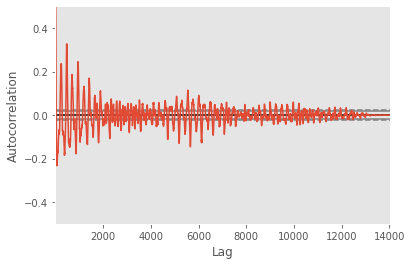

In [49]:
from pandas.plotting import autocorrelation_plot

plt.style.use('ggplot')
autocorrelation_plot(time_x['pelvic_ax'])
plt.ylim(-0.50, 0.50)
plt.show()

Peaks are well outside the significance point (horizontal line is 95% confidence interval)

[Finding periodic signal in time series data](https://qingkaikong.blogspot.com/2017/01/signal-processing-finding-periodic.html)

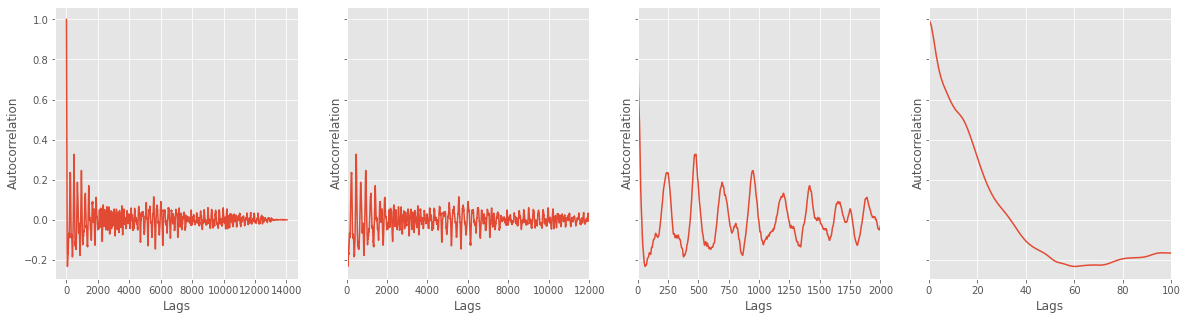

In [50]:
from statsmodels import api as sm
# get the autocorrelation coefficient
acf = sm.tsa.acf(time_x['pelvic_ax'], nlags=len(time_x['pelvic_ax']), fft=True)

fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize = (20,5))
lag = np.arange(len(time_x['pelvic_ax']))

for i in [0,1,2,3]:
    ax[i].plot(lag, acf)
    ax[i].set_xlabel('Lags')
    ax[i].set_ylabel('Autocorrelation')
    if i == 1:
        ax[i].set_xlim(0, 12000)
    elif i == 2:
        ax[i].set_xlim(0,2000)
    elif i == 3:
        ax[i].set_xlim(0,100)

In [51]:
acf_lag = pd.DataFrame({
    'lag':list(lag),
    'acf':list(acf)
})